In [1]:
from models import Discriminator, Generator
from datasets import ImageDataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch
import torchvision
from skimage import io, morphology
import matplotlib.pyplot as plt
import numpy as np
from models import UNet
from PIL import Image

In [43]:
# 83bd77482ae34178a5cb8113be67203b/last.ckpt res_baseline
# 791c9ceb4f6c4d138e3fc058bffafa26/epoch=24.ckpt 可以 bs4
# 6a61f7fd72194cb9872df8527405342f/epoch=7.ckpt 可以bs1的 

In [2]:
transforms_ = [
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))]
ds = ImageDataset('datasets/cycledsa_v2/', transforms_=transforms_, unaligned=False)

In [101]:
netG_B2A = Generator(1, 1)
checkpoint = torch.load('mlruns/0/83bd77482ae34178a5cb8113be67203b/last.ckpt', map_location='cpu')

netG_B2A = UNet(1,1)
# checkpoint = torch.load('mlruns/0/791c9ceb4f6c4d138e3fc058bffafa26/epoch=24.ckpt', map_location='cpu')
# checkpoint = torch.load('mlruns/0/791c9ceb4f6c4d138e3fc058bffafa26/epoch=37.ckpt', map_location='cpu')

# checkpoint = torch.load('mlruns/0/6a61f7fd72194cb9872df8527405342f/7.ckpt', map_location='cpu')# best
# checkpoint = torch.load('mlruns/0/6a61f7fd72194cb9872df8527405342f/11.ckpt', map_location='cpu') 
checkpoint = torch.load('mlruns/0/6a61f7fd72194cb9872df8527405342f/18.ckpt', map_location='cpu')

netG_B2A.eval()
netG_B2A.load_state_dict(checkpoint['netG_B2A'])

<All keys matched successfully>

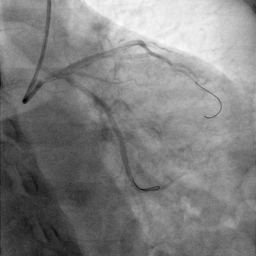

In [102]:
idx = 31
A = ds[idx]['A']
B = ds[idx]['B']
B_dnorm = torchvision.utils.make_grid(B,normalize=True)
transforms.ToPILImage()(B_dnorm)

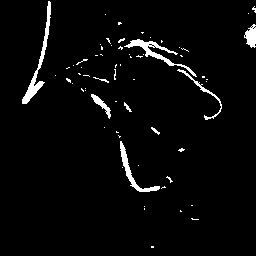

In [103]:
fakeA = netG_B2A.model(B.unsqueeze(0))
out = (fakeA[0]>0.01).float()
transforms.ToPILImage()(out)

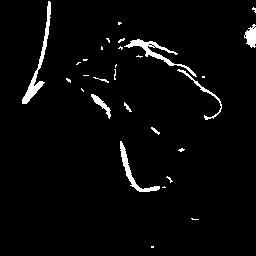

In [104]:
arr = out.numpy()[0]
cleaned = morphology.remove_small_objects(arr>0 , min_size=5)
Image.fromarray(cleaned)